https://www.tensorflow.org/guide/data?hl=zh-cn#%E4%BD%BF%E7%94%A8_numpy_%E6%95%B0%E7%BB%84

# tf.data

## 基本机制 ---数据集结构

In [2]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1]) # 将列表转换成tensor

Dataset 对象是一个 Python 可迭代对象。这使得利用 for 循环使用它的元素成为可能：

In [3]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


使用 iter 显式创建一个 Python 迭代器，并利用 next 来使用它的元素：

In [4]:
it = iter(dataset)
print(next(it).numpy())

8


In [5]:
print(tf.random.uniform([4, 10]))
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

tf.Tensor(
[[0.6304 0.2496 0.1371 0.1744 0.0914 0.9132 0.0132 0.5712 0.6421 0.5059]
 [0.031  0.6445 0.4258 0.1774 0.8197 0.8575 0.1524 0.6305 0.7446 0.8381]
 [0.029  0.3042 0.8679 0.6313 0.4333 0.4725 0.7528 0.6893 0.0916 0.1322]
 [0.2192 0.3082 0.8938 0.0363 0.1812 0.6259 0.361  0.4488 0.9269 0.6729]], shape=(4, 10), dtype=float32)


In [6]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]),
     tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

print(dataset2.element_spec)

(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))


In [7]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
print(dataset3.element_spec)

(TensorSpec(shape=(10,), dtype=tf.float32, name=None), (TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None)))


In [8]:
for batch_idx, (a, (b, c)) in enumerate(dataset3):
    print("The index of this batch is:", batch_idx)
    print("This batch elements of a:", a)
    print("This batch elements of b:", b)
    print("This batch elements of c:", c)
    print('shapes: {a.shape}, {b.shape}, {c.shape}'.format(a=a, b=b, c=c))
    print()

The index of this batch is: 0
This batch elements of a: tf.Tensor([0.2006 0.109  0.3516 0.4764 0.6424 0.2094 0.9412 0.3721 0.4753 0.7866], shape=(10,), dtype=float32)
This batch elements of b: tf.Tensor(0.8342788, shape=(), dtype=float32)
This batch elements of c: tf.Tensor(
[83 69 90 43 57 73 37 53 44 88 38 90 40 95 60 66 54 67 16 77 31 24  4 44
 28 58 43 36 15 91 41 43 33 85 44 97 42 41 63  6 40 77 49 90 86 35 65  4
 28  0  2 64 27 52 87 65 94 22 27 90 99 42 78 53 27 82 20 55 15 48 33 42
 91 72  9 28 42 26 91 95 31 65 37 78 78 91 34 78 19 55 26  9 87 56 28 55
 74 84 87 35], shape=(100,), dtype=int32)
shapes: (10,), (), (100,)

The index of this batch is: 1
This batch elements of a: tf.Tensor([0.0579 0.2299 0.4896 0.9423 0.7112 0.1821 0.7347 0.3799 0.0687 0.6908], shape=(10,), dtype=float32)
This batch elements of b: tf.Tensor(0.008661985, shape=(), dtype=float32)
This batch elements of c: tf.Tensor(
[51  3 22 81 68 60 21 67 65 89 10 68 21  6 79 96 87 35  4 72 39 94 60 27
 59 70 74  0

**行数一样对应batch的index**

**注意: tf.Tensor(0.21189964, shape=(), dtype=float32)  tf 里面含有一个元素但是它的shape是()!**

**函数补充说明**

**tf.random_uniform(shape,minval=0,maxval=None,dtype=tf.float32,seed=None,name=None)**

**shape**：一维整数张量或Python数组；输出张量的形状。

**minval**：dtype类型的0维张量或Python值；生成的随机值范围的下限。默认为0。

**maxval**：dtype类型的0维张量或Python值；要生成的随机值范围的上限。如果dtype是浮点,则默认为1。

**dtype**：输出的类型：float16、float32、float64、int32、orint64。

**seed**：一个 Python 整数。用于为分布创建一个随机种子。

**name**：操作的名称(可选)。


从均匀分布中输出随机值。生成的值在该[minval, maxval)范围内遵循均匀分布。下限 minval包含在范围内，而上限maxval被排除在外。对于浮点数，默认范围是[0,1)。对于整数，至少maxval必须明确地被指定。在整数情况下，随机整数稍有偏差，除非maxval-minval是2的精确幂。对于maxval-minval的值，偏差很小，明显小于输出(232 或者 264)的范围。

参考:https://blog.csdn.net/qq_28053699/article/details/96845270

In [9]:
dataset3.element_spec  # 大致可以用来看打包好的dataset的数据结构

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [10]:
# tf.SparseTensor（）学习一下
a = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))
for elem in dataset:
    print(elem)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [11]:
# Dataset containing a sparse(稀疏的) tensor.
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))
dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [12]:
# Use value_type to see the type of value represented by the element spec
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

## 读取输入数据

### 使用Numpy数组

如果您所有的输入数据都适合装入内存，那么从这些数据创建 Dataset 的最简单方式是将它们转换为 tf.Tensor 对象并使用 Dataset.from_tensor_slices。

In [16]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
len(train)

2

In [17]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

注：上面的代码段会将 features 和 labels 数组作为 tf.constant() 运算嵌入到 TensorFlow 计算图中。这对于小数据集来说效果很好，但是会浪费内存（因为数组的内容会被多次复制），并且可能会达到 tf.GraphDef 协议缓冲区的 2GB 上限。

###  使用 Python 生成器


另一个可被轻松整合为 tf.data.Dataset 的常用数据源是 Python 生成器。
小心：虽然这种方式比较简便，但它的可移植性和可扩缩性有限。它必须在创建生成器的同一 Python 进程中运行，且仍受 Python GIL 约束。

In [26]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [27]:
for n in count(5):
   print(n)

0
1
2
3
4


Dataset.from_generator 构造函数会将 Python 生成器转换为具有完整功能的 tf.data.Dataset。

构造函数会获取可调用对象作为输入，而非迭代器。这样，构造函数结束后便可重启生成器。构造函数会获取一个可选的 args 参数，作为可调用对象的参数。

output_types 参数是必需的，因为 tf.data 会在内部构建 tf.Graph，而计算图边缘需要 tf.dtype。

In [28]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes = (), )

for count_batch in ds_counter:
  print(count_batch.numpy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [30]:
for count_batch in ds_counter.repeat().batch(10).take(5):
  print(count_batch.numpy())

# batch_size大小为10，每行10列元素
# take(5)只取五组

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


output_shapes 参数虽然不是必需的，但强烈建议添加，因为许多 TensorFlow 运算不支持秩未知的张量。如果特定轴的长度未知或可变，请在 output_shapes 中将其设置为 None。

还需要注意的是，output_shapes 和 output_types 与其他数据集方法遵循相同的嵌套规则。

下面的示例生成器对两方面进行了演示，它会返回由数组组成的元组，其中第二个数组是长度未知的向量。

In [31]:
def gen_series():
  i = 0
  while True:
    size = np.random.randint(0, 10)
    yield i, np.random.normal(size=(size,))
    i += 1

In [32]:
for i, series in gen_series():
  print(i, ":", str(series))
  if i > 5:
    break

0 : [2.0082 0.2299 0.6049]
1 : [ 1.6272  0.0334  0.6806 -1.5635 -0.5667 -0.2421  1.5144 -0.3331  0.0474]
2 : [-0.4157 -0.5245  0.8131 -0.2293  2.1617]
3 : [-0.9569]
4 : [-1.0262]
5 : [ 0.4775 -0.3859]
6 : [-0.7758 -0.212  -0.0803  0.4054  0.1186]


第一个输出是 int32，第二个输出是 float32。

第一个条目是标量，形状为 ()，第二个条目是长度未知的向量，形状为 (None,)

In [33]:
ds_series = tf.data.Dataset.from_generator(
    gen_series, 
    output_types=(tf.int32, tf.float32), 
    output_shapes=((), (None,)))

ds_series

<FlatMapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

现在，可以将它当作常规 tf.data.Dataset 使用。请注意，在批处理形状可变的数据集时，需要使用 Dataset.padded_batch。

In [34]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[ 7 10 18  0 11 16 13  9  3 26]

[[ 0.0184  0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.8708 -0.5788 -0.3116  0.0562 -1.1651  0.9008  0.      0.      0.    ]
 [ 0.2597 -1.6813 -0.9168 -0.1192 -0.4463 -2.1434  0.      0.      0.    ]
 [ 0.4486 -0.9924 -0.2259 -1.6546  0.      0.      0.      0.      0.    ]
 [-0.5424 -1.7197  0.      0.      0.      0.      0.      0.      0.    ]
 [-0.7144  0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.4032  1.2224  0.2083  0.9766  0.3564  0.7066  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.498   1.9295  0.9494  0.0876 -1.2254  0.8444 -1.0002 -1.5448  1.188 ]]


举个更加实际的例子，请尝试将 preprocessing.image.ImageDataGenerator 封装为 tf.data.Dataset。

先下载数据：

### 处理 TFRecord 数据

### 使用文本数据

### 使用 CSV 数据

### 使用文件集

许多数据集会作为文件集进行分发，其中，每个文件都是一个样本。

In [41]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

flowers_root = pathlib.Path(flowers_root)
flowers_root

WindowsPath('C:/Users/RZ/.keras/datasets/flower_photos')

In [42]:
for item in flowers_root.glob("*"):
  print(item.name)

daisy
dandelion
LICENSE.txt
roses
sunflowers
tulips


In [43]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\tulips\\5674134129_2db5136cba.jpg'
b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\dandelion\\486234138_688e01aa9b_n.jpg'
b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\roses\\7502389724_85b4a6c855_n.jpg'
b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\dandelion\\8978962053_0727b41d26.jpg'
b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\daisy\\14402451388_56545a374a_n.jpg'


In [45]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [46]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xed\x05\xa4Photoshop 3.0\x008BIM\x04%\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008BIM\x03\xed\x00\x00\x00\x00\x00\x10\x01,\x00\x00\x00\x01\x00\x02\x01,\x00\x00\x00\x01\x00\x028BIM\x04&'

b'daisy'


## 补充:dataset中shuffle()、repeat()、batch() 等用法

参考:
https://blog.csdn.net/angel_hben/article/details/84341421?spm=1001.2101.3001.6650.5&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-5-84341421-blog-104047784.235%5Ev38%5Epc_relevant_default_base3&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-5-84341421-blog-104047784.235%5Ev38%5Epc_relevant_default_base3&utm_relevant_index=8

and

https://blog.csdn.net/ljyljyok/article/details/102939409?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-0-102939409-blog-104047784.235^v38^pc_relevant_default_base3&spm=1001.2101.3001.4242.1&utm_relevant_index=1

In [2]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
x = np.random.sample((11,2))
# make a dataset from a numpy array
x

array([[0.5488, 0.7152],
       [0.6028, 0.5449],
       [0.4237, 0.6459],
       [0.4376, 0.8918],
       [0.9637, 0.3834],
       [0.7917, 0.5289],
       [0.568 , 0.9256],
       [0.071 , 0.0871],
       [0.0202, 0.8326],
       [0.7782, 0.87  ],
       [0.9786, 0.7992]])

In [4]:
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset = dataset.shuffle(2)  # 将数据打乱，数值越大，混乱程度越大
dataset = dataset.batch(4)    # 按照顺序取出4行数据，最后一次输出可能小于batch
dataset = dataset.repeat(2)    # 数据集重复了指定次数

for count_batch in dataset:
  print(count_batch.numpy())
  print()

[[0.6028 0.5449]
 [0.4237 0.6459]
 [0.4376 0.8918]
 [0.9637 0.3834]]

[[0.7917 0.5289]
 [0.568  0.9256]
 [0.071  0.0871]
 [0.5488 0.7152]]

[[0.7782 0.87  ]
 [0.9786 0.7992]
 [0.0202 0.8326]]

[[0.6028 0.5449]
 [0.5488 0.7152]
 [0.4237 0.6459]
 [0.4376 0.8918]]

[[0.9637 0.3834]
 [0.568  0.9256]
 [0.071  0.0871]
 [0.0202 0.8326]]

[[0.7782 0.87  ]
 [0.7917 0.5289]
 [0.9786 0.7992]]



**repeat()在batch操作输出完毕后再执行,若在之前，相当于先把整个数据集复制两次**

为了配合输出次数，一般默认repeat()空

### from_tensors

创建一个Dataset包含给定张量的单个元素。

函数形式：from_tensors（tensors）

参数tensors:张量的嵌套结构。

In [8]:
dataset = tf.data.Dataset.from_tensors([1,2,7,8,9])
for count_batch in dataset:
  print(count_batch.numpy())

[1 2 7 8 9]


In [9]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,7,8,9])
for count_batch in dataset:
  print(count_batch.numpy())

1
2
7
8
9


### from_generator

创建Dataset由其生成元素的元素generator。

函数形式：from_generator(generator,output_types,output_shapes=None,args=None)

参数generator:一个可调用对象，它返回支持该iter()协议的对象 。如果args未指定，generator则不得参数; 否则它必须采取与有值一样多的参数args。
参数output_types：tf.DType对应于由元素生成的元素的每个组件的对象的嵌套结构generator。
参数output_shapes:tf.TensorShape 对应于由元素生成的元素的每个组件的对象 的嵌套结构generator
参数args:tf.Tensor将被计算并将generator作为NumPy数组参数传递的对象元组。

**结论**： 即from_tensors是将tensors作为一个整体进行操纵，而from_tensor_slices可以操纵tensors里面的元素。

### batch

batch可以将数据集的连续元素合成批次。

函数形式：batch(batch_size,drop_remainder=False)

参数batch_size:表示要在单个批次中合并的此数据集的连续元素个数。
参数drop_remainder：表示在少于batch_size元素的情况下是否应删除最后一批 ; 默认是不删除。

In [12]:
#创建一个Dataset对象
dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9])
'''合成批次'''
dataset=dataset.batch(4)
for count_batch in dataset:
  print(count_batch.numpy())

[1 2 3 4]
[5 6 7 8]
[9]


### skip

生成一个跳过count元素的数据集。

函数形式：skip(count)


参数count:表示应跳过以形成新数据集的此数据集的元素数。如果count大于此数据集的大小，则新数据集将不包含任何元素。如果count 为-1，则跳过整个数据集。

In [13]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,2,3,4,5,6,7,8,9])
dataset=dataset.take(5) # 提取前5个元素形成新数据
for count_batch in dataset:
  print(count_batch.numpy())

1
2
2
3
4


### take

提取前count个元素形成性数据集

函数形式：take(count)

参数count:表示应该用于形成新数据集的此数据集的元素数。如果count为-1，或者count大于此数据集的大小，则新数据集将包含此数据集的所有元素。

In [14]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,2,3,4,5,6,7,8,9])
dataset=dataset.skip(5)  # 跳过前5个元素
for count_batch in dataset:
  print(count_batch.numpy())

5
6
7
8
9


### repeat

重复此数据集count次数

函数形式：repeat(count=None)

参数count:(可选）表示数据集应重复的次数。默认行为（如果count是None或-1）是无限期重复的数据集。

In [16]:
dataset = tf.data.Dataset.from_tensor_slices([1,3,4,9])
#无限次重复dataset数据集dataset=dataset.repeat()
dataset=dataset.repeat(2)  # 重复dataset数据集2次
for count_batch in dataset:
  print(count_batch.numpy())

1
3
4
9
1
3
4
9


### shuffle

随机混洗数据集的元素。


函数形式：shuffle(buffer_size,seed=None,reshuffle_each_iteration=None)

参数buffer_size:表示新数据集将从中采样的数据集中的元素数。

参数seed:(可选）表示将用于创建分布的随机种子。

参数reshuffle_each_iteration:(可选）一个布尔值，如果为true，则表示每次迭代时都应对数据集进行伪随机重组。（默认为True。）

In [15]:
dataset = tf.data.Dataset.range(10).batch(2)
dataset = dataset.map(lambda x: x + 10)
for count_batch in dataset:
  print(count_batch.numpy(), end=',')

[10 11],[12 13],[14 15],[16 17],[18 19],

In [21]:
dataset = tf.data.Dataset.range(10).shuffle(10).batch(2)#对[1~10]洗牌
dataset = dataset.map(lambda x: x + 10)
for count_batch in dataset:
  print(count_batch.numpy(), end=',')

[17 18],[16 12],[15 19],[14 13],[11 10],

In [22]:
dataset = tf.data.Dataset.range(10).batch(2).shuffle(10)#对许多的[n, n+1]洗牌
dataset = dataset.map(lambda x: x + 10)
for count_batch in dataset:
  print(count_batch.numpy(), end=',')

[16 17],[10 11],[12 13],[18 19],[14 15],

### concatenate

concatenate可以将两个Dataset对象进行合并或连接.

函数形式：concatenate(dataset)

参数dataset:表示需要传入的dataset对象。

In [16]:
#创建dataset对象
dataset_a=tf.data.Dataset.from_tensor_slices([1,2,3])
dataset_b=tf.data.Dataset.from_tensor_slices([4,5,6])
#合并dataset
dataset=dataset_a.concatenate(dataset_b)

for count_batch in dataset:
  print(count_batch.numpy())

1
2
3
4
5
6


### filter

filter可以对传入的dataset数据进行条件过滤.

函数形式：filter(predicate)

参数predicate:条件过滤函数

In [17]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9])
dataset=dataset.filter(lambda x:x>3)
for count_batch in dataset:
  print(count_batch.numpy())

4
5
6
7
8
9


### shard

将Dataset分割成num_shards个子数据集。这个函数在分布式训练中非常有用，它允许每个设备读取唯一子集。

函数形式：shard( num_shards,index)

参数num_shards:表示并行运行的分片数。
参数index:表示工人索引。

### map

参考: https://blog.csdn.net/anshuai_aw1/article/details/105094548


语法:

dataset = dataset.map(map_func=_decode_and_resize, num_parallel_calls=2)

通过设置 Dataset.map() 的 num_parallel_calls 参数实现数据转换的并行化, 上述假设用于训练的计算机具有 2 核的 CPU

**map接收一个函数，Dataset中的每个元素都会被当作这个函数的输入，并将函数返回值作为新的Dataset**

如我们可以对dataset中每个元素的值加10

In [14]:
dataset = tf.data.Dataset.range(10).batch(2).shuffle(10)
dataset = dataset.map(lambda x: x + 10)
for count_batch in dataset:
  print(count_batch.numpy(), end=',')

[16 17],[12 13],[18 19],[10 11],[14 15],

### flat_map

flat_map可以将map_func函数映射到数据集（与map不同的是flat_map传入的数据必须是一个dataset）。

函数形式：flat_map(map_func)

参数map_func:映射函数

In [18]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9])
#进行flat_map操作
dataset=dataset.flat_map(lambda x:tf.data.Dataset.from_tensor_slices(x+[1]))
for count_batch in dataset:
  print(count_batch.numpy())

2
3
4
5
6
7
8
9
10


### padded_batch

将数据集的连续元素组合到填充批次中,此转换将输入数据集的多个连续元素组合为单个元素。

函数形式：**padded_batch(batch_size,padded_shapes,padding_values=None,drop_remainder=False)**

**参数batch_size**：表示要在单个批次中合并的此数据集的连续元素数。

**参数padded_shapes**：嵌套结构tf.TensorShape或 tf.int64类似矢量张量的对象，表示在批处理之前应填充每个输入元素的相应组件的形状。任何未知的尺寸（例如，tf.Dimension(None)在一个tf.TensorShape或-1类似张量的物体中）将被填充到每个批次中该尺寸的最大尺寸。

**参数padding_values**:(可选）标量形状的嵌套结构 tf.Tensor，表示用于各个组件的填充值。默认值0用于数字类型，空字符串用于字符串类型。

**参数drop_remainder**:(可选）一个tf.bool标量tf.Tensor，表示在少于batch_size元素的情况下是否应删除最后一批 ; 默认行为是不删除较小的批处理。

In [22]:
dataset = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9])
dataset=dataset.padded_batch(2,padded_shapes=[])

for count_batch in dataset:
  print(count_batch.numpy())

[1 2]
[3 4]
[5 6]
[7 8]
[9]


### zip

将给定数据集压缩在一起

函数形式：zip（datasets）

参数datesets:数据集的嵌套结构。

In [24]:
dataset_a=tf.data.Dataset.from_tensor_slices([1,2,3])
dataset_b=tf.data.Dataset.from_tensor_slices([2,6,8])
dataset=tf.data.Dataset.zip((dataset_a,dataset_b))

for (x, y)in dataset:
  print(x.numpy(), y.numpy())

1 2
2 6
3 8


### interleave

参考:  https://blog.csdn.net/menghuanshen/article/details/104240189

interleave()是Dataset的类方法，所以interleave是作用在一个Dataset上的。

语法：

interleave(

    map_func,
    cycle_length=AUTOTUNE,
    block_length=1,
    num_parallel_calls=None
)


解释：

1.假定我们现在有一个Dataset——A

2.从该A中取出cycle_length个element，然后对这些element apply map_func,得到cycle_length个新的Dataset对象。

3.然后从这些新生成的Dataset对象中取数据，取数逻辑为轮流从每个对象里面取数据，每次取block_length个数据

4.当这些新生成的某个Dataset的对象取尽时，从原Dataset中再取cycle_length个element，，然后apply
map_func，以此类推。

**举例**

In [4]:
a = tf.data.Dataset.range(1, 6)  # ==> [ 1, 2, 3, 4, 5 ]
a

<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [3]:
a = tf.data.Dataset.range(1, 6)  # ==> [ 1, 2, 3, 4, 5 ]
# NOTE: New lines indicate "block" boundaries.
b=a.interleave(lambda x: tf.data.Dataset.from_tensors(x).repeat(6),
            cycle_length=2, block_length=4) 
for item in b:
    print(item.numpy(),end=', ')

1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 

In [23]:
int('12345', base=8)

5349

In [26]:
int('12345')

12345

In [25]:
int('1000000', base=2)

64

## 预处理数据

Dataset.map(f) 转换会通过对输入数据集的每个元素应用一个给定函数 f 来生成一个新的数据集。它基于 map() 函数，该函数通常应用于函数式编程语言中的列表（和其他结构）。函数 f 会获取在输入中表示单个元素的 tf.Tensor 对象，并返回在新数据集中表示单个元素的 tf.Tensor 对象。它的实现使用标准的 TensorFlow 运算来将一个元素转换为另一个元素。

本部分介绍了关于 Dataset.map() 使用方法的常见示例。

### 解码图像数据并调整大小

使用真实的图像数据训练神经网络时，常常需要将不同大小的图像转换为统一大小，以便将其批处理成某一固定大小。

重建花卉文件名数据集：

In [4]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

flowers_root = pathlib.Path(flowers_root)

In [5]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [55]:
file_path = next(iter(list_ds))
print(file_path)

tf.Tensor(b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\dandelion\\14362539701_cf19e588ca.jpg', shape=(), dtype=string)


In [57]:
image = tf.io.read_file(file_path)
image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cTICC_PROFILE\x00\x01\x01\x00\x00\x0cDUCCM\x02@\x00\x00mntrRGB XYZ \x07\xd3\x00\x04\x00\x04\x00\x00\x00\x00\x00\x00acspMSFT\x00\x00\x00\x00CANOZ009\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-CANO\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0erTRC\x00\x00\x01,\x00\x00\x08\x0cgTRC\x00\x00\x01,\x00\x00\x08\x0cbTRC\x00\x00\x01,\x00\x00\x08\x0crXYZ\x00\x00\t8\x00\x00\x00\x14gXYZ\x00\x00\tL\x00\x00\x00\x14bXYZ\x00\x00\t`\x00\x00\x00\x14chad\x00\x00\tt\x00\x00\x00,cprt\x00\x00\t\xa0\x00\x00\x00@dmnd\x00\x00\t\xe0\x00\x00\x00|dmdd\x00\x00\n\\\x00\x00\x00\x94wtpt\x00\x00\n\xf0\x00\x00\x00\x14tech\x00\x00\x0b\x04\x00\x00\x00\x0cdesc\x00\x00\n\\\x00\x00\x00\x94ucmI\x00\x00\x0b\x10\x00\x00\x0

In [58]:
image = tf.io.decode_jpeg(image)
image

<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[188, 212, 154],
        [191, 212, 155],
        [192, 213, 157],
        ...,
        [160, 188, 139],
        [156, 184, 133],
        [152, 181, 127]],

       [[179, 204, 138],
        [182, 204, 140],
        [184, 206, 142],
        ...,
        [135, 162, 111],
        [131, 158, 105],
        [129, 156, 101]],

       [[171, 195, 121],
        [172, 196, 122],
        [175, 199, 125],
        ...,
        [123, 148,  93],
        [119, 144,  89],
        [116, 141,  84]],

       ...,

       [[ 79, 119,  49],
        [ 80, 117,  48],
        [ 80, 117,  48],
        ...,
        [ 56,  78,  40],
        [ 54,  74,  39],
        [ 50,  69,  37]],

       [[ 81, 118,  51],
        [ 80, 117,  50],
        [ 79, 116,  49],
        ...,
        [ 55,  75,  38],
        [ 51,  71,  36],
        [ 48,  67,  35]],

       [[ 80, 117,  50],
        [ 79, 116,  49],
        [ 78, 115,  48],
        ...,
        [ 55,  72,  3

In [59]:
image = tf.image.convert_image_dtype(image, tf.float32)
image

<tf.Tensor: shape=(333, 500, 3), dtype=float32, numpy=
array([[[0.7373, 0.8314, 0.6039],
        [0.749 , 0.8314, 0.6078],
        [0.7529, 0.8353, 0.6157],
        ...,
        [0.6275, 0.7373, 0.5451],
        [0.6118, 0.7216, 0.5216],
        [0.5961, 0.7098, 0.498 ]],

       [[0.702 , 0.8   , 0.5412],
        [0.7137, 0.8   , 0.549 ],
        [0.7216, 0.8078, 0.5569],
        ...,
        [0.5294, 0.6353, 0.4353],
        [0.5137, 0.6196, 0.4118],
        [0.5059, 0.6118, 0.3961]],

       [[0.6706, 0.7647, 0.4745],
        [0.6745, 0.7686, 0.4784],
        [0.6863, 0.7804, 0.4902],
        ...,
        [0.4824, 0.5804, 0.3647],
        [0.4667, 0.5647, 0.349 ],
        [0.4549, 0.5529, 0.3294]],

       ...,

       [[0.3098, 0.4667, 0.1922],
        [0.3137, 0.4588, 0.1882],
        [0.3137, 0.4588, 0.1882],
        ...,
        [0.2196, 0.3059, 0.1569],
        [0.2118, 0.2902, 0.1529],
        [0.1961, 0.2706, 0.1451]],

       [[0.3176, 0.4627, 0.2   ],
        [0.3137, 0.458

In [60]:
image = tf.image.resize(image, [128, 128])
image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.724 , 0.8094, 0.5643],
        [0.7344, 0.816 , 0.5932],
        [0.7645, 0.84  , 0.6535],
        ...,
        [0.4947, 0.5819, 0.3963],
        [0.5542, 0.6467, 0.4671],
        [0.5404, 0.647 , 0.4443]],

       [[0.6632, 0.7574, 0.4515],
        [0.6799, 0.7726, 0.4863],
        [0.7015, 0.793 , 0.5545],
        ...,
        [0.4746, 0.5562, 0.3628],
        [0.4925, 0.5819, 0.3882],
        [0.4726, 0.5581, 0.351 ]],

       [[0.6645, 0.7508, 0.4666],
        [0.672 , 0.7569, 0.4815],
        [0.6925, 0.7856, 0.5508],
        ...,
        [0.4421, 0.5291, 0.3262],
        [0.4666, 0.5557, 0.3621],
        [0.4288, 0.5072, 0.3115]],

       ...,

       [[0.3333, 0.4784, 0.2039],
        [0.3554, 0.4891, 0.2171],
        [0.3608, 0.4991, 0.2303],
        ...,
        [0.1569, 0.2282, 0.1137],
        [0.2123, 0.3011, 0.1406],
        [0.2353, 0.3269, 0.1707]],

       [[0.3185, 0.4636, 0.193 ],
        [0.3437, 0.482

In [52]:
file_path = next(iter(list_ds))
print(file_path)

parts = tf.strings.split(file_path, os.sep)
parts

tf.Tensor(b'C:\\Users\\RZ\\.keras\\datasets\\flower_photos\\sunflowers\\7654774598_6b715a8d3e.jpg', shape=(), dtype=string)


<tf.Tensor: shape=(8,), dtype=string, numpy=
array([b'C:', b'Users', b'RZ', b'.keras', b'datasets', b'flower_photos',
       b'sunflowers', b'7654774598_6b715a8d3e.jpg'], dtype=object)>

编写一个操作数据集元素的函数。

In [53]:
label = parts[-2]
label

<tf.Tensor: shape=(), dtype=string, numpy=b'sunflowers'>

In [54]:
image = tf.io.read_file(filename)
image

NameError: name 'filename' is not defined

In [7]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

测试它的有效性。

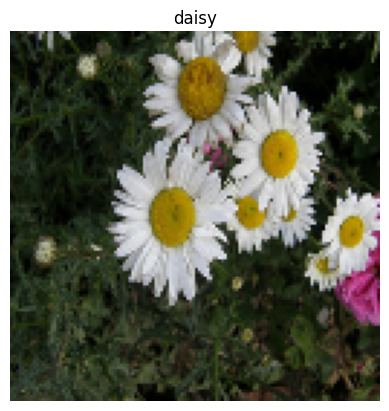

In [8]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

测试它的有效性。

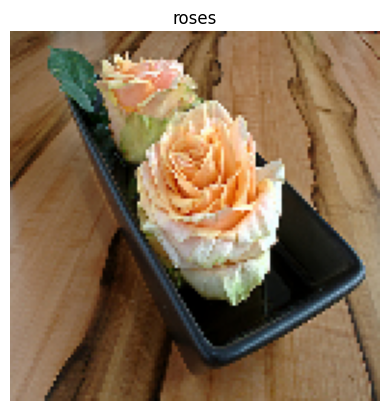

In [62]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

将它映射到数据集。

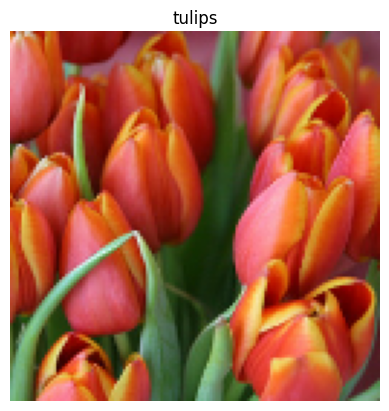

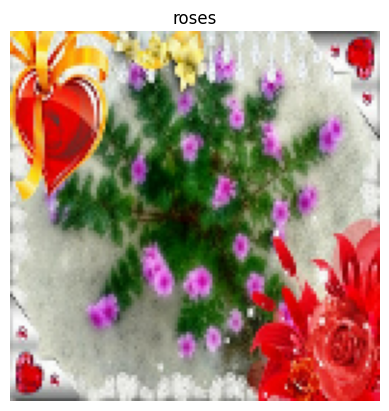

In [10]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

### 应用任意 Python 逻辑

出于性能考虑，请尽可能使用 TensorFlow 运算预处理数据。不过，在解析输入数据时，调用外部 Python 库有时会很有帮助。您可以在 Dataset.map 转换中使用 tf.py_function 运算。

例如，如果您想应用一个随机旋转，而 tf.image 模块只有 tf.image.rot90，这对图像增强不是很有帮助。

注：tensorflow_addons 在 tensorflow_addons.image.rotate 中有一个与 TensorFlow 兼容的 rotate。

为了演示 tf.py_function，请尝试使用 scipy.ndimage.rotate 函数：

In [2]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


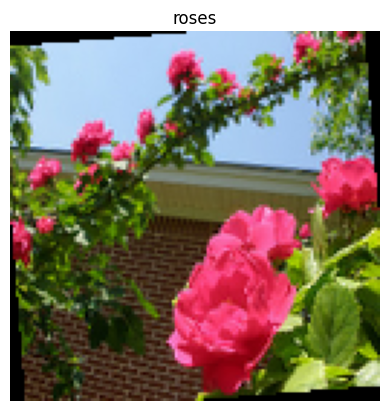

In [12]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

要将此函数用于 Dataset.map，需留意与 Dataset.from_generator 相同的注意事项，在应用该函数时需要描述返回的形状和类型：

In [13]:
def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


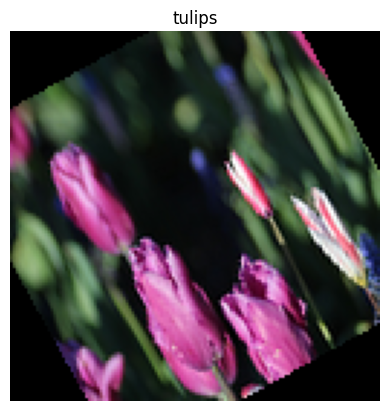

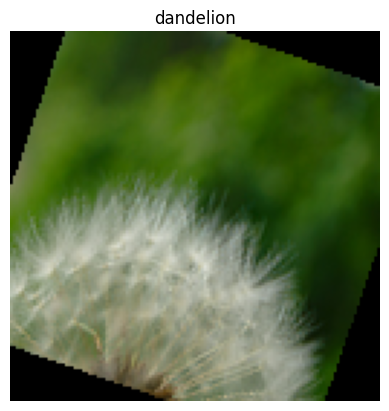

In [14]:
rot_ds = images_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(2):
  show(image, label)

### 解析 tf.Example 协议缓冲区消息

许多输入流水线从 TFRecord 格式文件中提取 tf.train.Example 协议缓冲区消息。每个 tf.train.Example 记录包含一个或多个“特征”，而输入流水线通常会将这些特征转换为张量。

In [15]:
fsns_test_file = "test_data/fsns-00000-of-00001"
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

您可以在 tf.data.Dataset 外部使用 tf.train.Example 协议来理解数据：

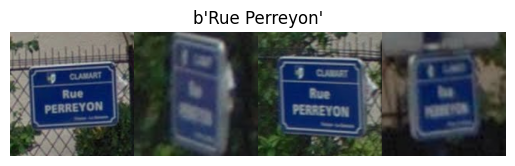

In [16]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

feature = parsed.features.feature
raw_img = feature['image/encoded'].bytes_list.value[0]
img = tf.image.decode_png(raw_img)
plt.imshow(img)
plt.axis('off')
_ = plt.title(feature["image/text"].bytes_list.value[0])

In [17]:
raw_example = next(iter(dataset))

In [18]:
def tf_parse(eg):
  example = tf.io.parse_example(
      eg[tf.newaxis], {
          'image/encoded': tf.io.FixedLenFeature(shape=(), dtype=tf.string),
          'image/text': tf.io.FixedLenFeature(shape=(), dtype=tf.string)
      })
  return example['image/encoded'][0], example['image/text'][0]

In [19]:
img, txt = tf_parse(raw_example)
print(txt.numpy())
print(repr(img.numpy()[:20]), "...")

b'Rue Perreyon'
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X' ...


In [20]:
decoded = dataset.map(tf_parse)
decoded

<MapDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [21]:
image_batch, text_batch = next(iter(decoded.batch(10)))
image_batch.shape

TensorShape([10])

### 时间序列窗口化

有关端到端的时间序列示例，请参阅：时间序列预测。

时间序列数据通常以保持完整时间轴的方式进行组织。

用一个简单的 Dataset.range 来演示：

In [22]:
range_ds = tf.data.Dataset.range(100000)

通常，基于此类数据的模型需要一个连续的时间片。

最简单的方式是批处理这些数据：

使用 batch

In [23]:
batches = range_ds.batch(10, drop_remainder=True)

for batch in batches.take(5):
  print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


或者，要对未来进行一步密集预测，您可以将特征和标签相对彼此移动一步：

In [24]:
def dense_1_step(batch):
  # Shift features and labels one step relative to each other.
  return batch[:-1], batch[1:]

predict_dense_1_step = batches.map(dense_1_step)

for features, label in predict_dense_1_step.take(3):
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8]  =>  [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]  =>  [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28]  =>  [21 22 23 24 25 26 27 28 29]


要预测整个窗口而非一个固定偏移量，您可以将批次分成两部分：

In [25]:
batches = range_ds.batch(15, drop_remainder=True)

def label_next_5_steps(batch):
  return (batch[:-5],   # Inputs: All except the last 5 steps
          batch[-5:])   # Labels: The last 5 steps

predict_5_steps = batches.map(label_next_5_steps)

for features, label in predict_5_steps.take(3):
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]  =>  [25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42 43 44]


要允许一个批次的特征和另一批次的标签部分重叠，请使用 Dataset.zip：

In [26]:
feature_length = 10
label_length = 3

features = range_ds.batch(feature_length, drop_remainder=True)
labels = range_ds.batch(feature_length).skip(1).map(lambda labels: labels[:label_length])

predicted_steps = tf.data.Dataset.zip((features, labels))

for features, label in predicted_steps.take(5):
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12]
[10 11 12 13 14 15 16 17 18 19]  =>  [20 21 22]
[20 21 22 23 24 25 26 27 28 29]  =>  [30 31 32]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42]
[40 41 42 43 44 45 46 47 48 49]  =>  [50 51 52]


使用 window

尽管使用 Dataset.batch 奏效，某些情况可能需要更精细的控制。Dataset.window 方法可以为您提供完全控制，但需要注意：它返回的是由 Datasets 组成的 Dataset。请参阅数据集结构部分以了解详情。

In [27]:
window_size = 5

windows = range_ds.window(window_size, shift=1)
for sub_ds in windows.take(5):
  print(sub_ds)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


Dataset.flat_map 方法可以获取由数据集组成的数据集，并将其合并为一个数据集：

In [28]:
for x in windows.flat_map(lambda x: x).take(30):
   print(x.numpy(), end=' ')

0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8 5 6 7 8 9 

在几乎所有情况下，您都需要先 Dataset.batch 数据集：

In [29]:
def sub_to_batch(sub):
  return sub.batch(window_size, drop_remainder=True)

for example in windows.flat_map(sub_to_batch).take(5):
  print(example.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]


现在，您可以看到 shift 参数控制着每个窗口的移动量。

将上述内容整合起来，您就可以编写出以下函数：

In [30]:
def make_window_dataset(ds, window_size=5, shift=1, stride=1):
  windows = ds.window(window_size, shift=shift, stride=stride)

  def sub_to_batch(sub):
    return sub.batch(window_size, drop_remainder=True)

  windows = windows.flat_map(sub_to_batch)
  return windows

In [31]:
ds = make_window_dataset(range_ds, window_size=10, shift = 5, stride=3)

for example in ds.take(10):
  print(example.numpy())

[ 0  3  6  9 12 15 18 21 24 27]
[ 5  8 11 14 17 20 23 26 29 32]
[10 13 16 19 22 25 28 31 34 37]
[15 18 21 24 27 30 33 36 39 42]
[20 23 26 29 32 35 38 41 44 47]
[25 28 31 34 37 40 43 46 49 52]
[30 33 36 39 42 45 48 51 54 57]
[35 38 41 44 47 50 53 56 59 62]
[40 43 46 49 52 55 58 61 64 67]
[45 48 51 54 57 60 63 66 69 72]


然后，可以像之前一样轻松提取标签：

In [33]:
dense_labels_ds = ds.map(dense_1_step)

for inputs,labels in dense_labels_ds.take(3):
  print(inputs.numpy(), "=>", labels.numpy())

[ 0  3  6  9 12 15 18 21 24] => [ 3  6  9 12 15 18 21 24 27]
[ 5  8 11 14 17 20 23 26 29] => [ 8 11 14 17 20 23 26 29 32]
[10 13 16 19 22 25 28 31 34] => [13 16 19 22 25 28 31 34 37]


### 重采样

在处理类非常不平衡的数据集时，您可能需要对数据集重新采样。tf.data 为此提供了两种方法。信用卡欺诈数据集就是此类问题一个很好的例子。

注：请转到不平衡数据分类了解完整教程。

In [36]:
zip_path = "test_data/creditcard.zip"
csv_path = zip_path.replace('.zip', '.csv')

'test_data/creditcard.csv'

In [37]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name="Class",
    # Set the column types: 30 floats and an int.
    column_defaults=[float()]*30+[int()])

现在，检查类的分布，它是高度倾斜的：

In [38]:
def count(counts, batch):
  features, labels = batch
  class_1 = labels == 1
  class_1 = tf.cast(class_1, tf.int32)

  class_0 = labels == 0
  class_0 = tf.cast(class_0, tf.int32)

  counts['class_0'] += tf.reduce_sum(class_0)
  counts['class_1'] += tf.reduce_sum(class_1)

  return counts

In [39]:
counts = creditcard_ds.take(10).reduce(
    initial_state={'class_0': 0, 'class_1': 0},
    reduce_func = count)

counts = np.array([counts['class_0'].numpy(),
                   counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print(fractions)

[0.9951 0.0049]


使用不平衡的数据集进行训练的一种常用方式是使其平衡。tf.data 包括一些能够让此工作流变得可行的方法：

数据集采样
对数据集重新采样的一种方式是使用 sample_from_datasets。当每个类都有单独的 tf.data.Dataset 时，这种方式更加适用。

下面用过滤器从信用卡欺诈数据中生成一个重采样数据集：

In [41]:
negative_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==0)
    .repeat())
positive_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==1)
    .repeat())

In [42]:
for features, label in positive_ds.batch(10).take(1):
  print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


要使用 tf.data.Dataset.sample_from_datasets 传递数据集以及每个数据集的权重，请运行以下代码：

In [43]:
balanced_ds = tf.data.Dataset.sample_from_datasets(
    [negative_ds, positive_ds], [0.5, 0.5]).batch(10)

现在，数据集为每个类生成样本的概率是 50/50：

In [44]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

[0 0 1 1 0 1 0 1 0 0]
[1 0 0 1 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 1 0 1 0]
[1 1 1 0 0 0 1 1 0 0]
[1 1 1 1 0 1 0 0 1 0]
[1 0 1 1 0 1 0 1 1 1]
[0 1 0 0 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1 0 1]
[1 1 0 1 1 1 0 0 1 0]


拒绝重采样

上述 Dataset.sample_from_datasets 方式的一个问题是每个类需要一个单独的 tf.data.Dataset。您可以使用 Dataset.filter 创建这两个数据集，但这会导致所有数据被加载两次。

可以将 tf.data.Dataset.rejection_resample 方法应用于数据集以使其重新平衡，而且只需加载一次数据。元素将被删除或重复，以实现平衡。

rejection_resample 需要一个 class_func 参数。这个 class_func 参数会被应用至每个数据集元素，并且会被用来确定某个样本属于哪一类，以实现平衡的目的。

这里的目标是平衡标签分布，而 creditcard_ds 的元素已经形成 (features, label) 对。因此，class_func 只需返回这些标签：

In [45]:
def class_func(features, label):
  return label

重采样方法会处理单个样本，因此您必须在应用该方法前 unbatch 数据集。

该方法需要一个目标分布，以及一个可选的初始分布估计作为输入：

In [47]:
resample_ds = (
    creditcard_ds
    .unbatch()
    .rejection_resample(class_func, target_dist=[0.5,0.5],
                        initial_dist=fractions)
    .batch(10))

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



rejection_resample 方法会返回 (class, example) 对，其中的 class 为 class_func 的输出。在此例中，example 已经形成 (feature, label) 对，因此请使用 map 删除多余的标签副本：

In [48]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

现在，数据集为每个类生成样本的概率是 50/50：

In [49]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

[1 0 1 1 0 1 1 1 1 0]
[1 1 1 0 0 1 1 0 0 0]
[0 1 1 1 1 0 1 0 0 0]
[0 0 0 1 0 1 0 1 1 0]
[1 1 0 1 0 0 0 1 1 1]
[1 1 0 0 0 0 0 1 0 1]
[0 1 1 1 0 1 0 1 1 0]
[1 0 1 0 1 1 0 1 0 1]
[1 0 1 1 1 1 1 1 0 1]
[1 1 1 0 0 0 1 0 1 1]


## 迭代器检查点操作

TensorFlow 支持获取检查点 ，这样当训练过程重启时，可以还原至最新的检查点，从而恢复大部分进度。除了可以对模型变量进行检查点操作外，您还可以为数据集迭代器的进度设置检查点。如果您有一个很大的数据集，并且不想在每次重启后都从头开始，此功能会非常有用。但是请注意，迭代器检查点可能会很大，因为像 Dataset.shuffle 和 Dataset.prefetch 之类的转换需要在迭代器内缓冲元素。

要在检查点中包含迭代器，请将迭代器传递至 tf.train.Checkpoint 构造函数。

In [51]:
range_ds = tf.data.Dataset.range(20)

iterator = iter(range_ds)
ckpt = tf.train.Checkpoint(step=tf.Variable(0), iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, '/tmp/my_ckpt', max_to_keep=3)

print([next(iterator).numpy() for _ in range(5)])

save_path = manager.save()

print([next(iterator).numpy() for _ in range(5)])

ckpt.restore(manager.latest_checkpoint)

print([next(iterator).numpy() for _ in range(5)])

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


注：无法为依赖于外部状态的迭代器（例如 tf.py_function）设置检查点。尝试这样做将引发外部状态异常。

## 结合使用 tf.data 与 tf.keras

tf.keras API 在创建和执行机器学习模型的许多方面进行了简化。它的 Model.fit、Model.evaluate 和 Model.predict API 支持将数据集作为输入。下面是一个快速的数据集和模型设置：

In [52]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [53]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

只需向 Model.fit 和 Model.evaluate 传递一个由 (feature, label) 对组成的数据集：

In [54]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6011 - accuracy: 0.7948
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.8429


如果您要传递一个无限大的数据集（比如通过调用 Dataset.repeat），您只需要同时传递 steps_per_epoch 参数：

In [55]:
model.fit(fmnist_train_ds.repeat(), epochs=2, steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8406
Epoch 2/2
20/20 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.8391


对于评估，可以传递评估步数：

In [56]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4340 - accuracy: 0.8533
Loss : 0.43404123187065125
Accuracy : 0.8533499836921692


对于长数据集，可以设置要评估的步数：

In [57]:
loss, accuracy = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss :", loss)
print("Accuracy :", accuracy)

10/10 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8719
Loss : 0.4239424765110016
Accuracy : 0.871874988079071


调用 Model.predict 时不需要标签。

In [58]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 1ms/step
(320, 10)


但是，如果您传递了包含标签的数据集，则标签会被忽略：

In [59]:
result = model.predict(fmnist_train_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 1ms/step
(320, 10)
